<br><br>
<h1 align="center"> 04 More Data Visualization and Inferences - altair </h1>
<br><br>

In [1]:
'''Import the libraries'''
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from IPython.display import HTML
import hashlib
import joblib
import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import r2_score
import altair as alt
from altair import Chart
from vega_datasets import data

alt.renderers.enable('notebook')

'''This notebook will use ggplot style'''
# plt.style.use('ggplot')

colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

In [2]:
'''Load the data. It's big, set low_memory=False'''
loan_data = pd.read_csv('/opt/apps/ml-data/bigdata/lending_club/loan_data.csv', low_memory=False)

In [3]:
'''Update the datetime columns from string to datetime'''
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'])

In [12]:
'''For EDA, we will use the year 2018 data'''
loan_data_2018 = loan_data[loan_data['issue_d'].dt.year == 2018].head(500)
print(loan_data_2018.shape)

(500, 38)


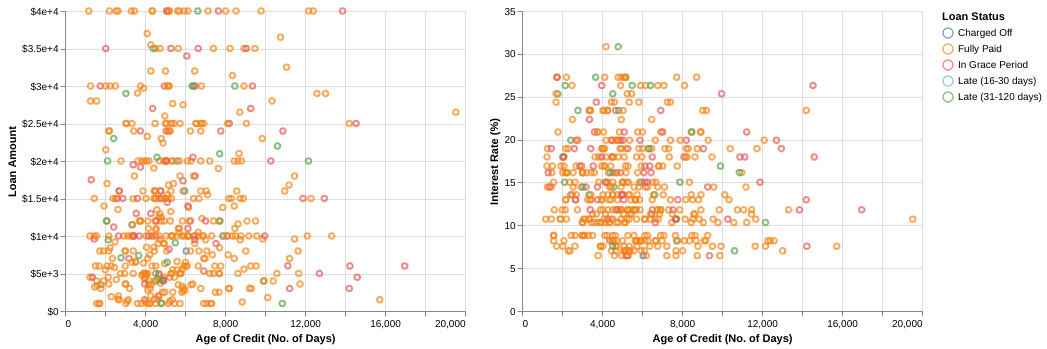

In [39]:
brush = alt.selection(type='interval')

alt.data_transformers.disable_max_rows()
horse_mpg = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('loan_amnt:Q', axis=alt.Axis(format='$', title='Loan Amount')),
    color=alt.condition(brush, 'loan_status:N', alt.value('lightgray'), title='Loan Status')
).add_selection(brush)

horse_acc = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('int_rate:Q', axis=alt.Axis(title='Interest Rate (%)')),
    color=alt.condition(brush, 'loan_status:N', alt.value('lightgray'), title='Loan Status')
).transform_filter(
    brush
)

horse_mpg | horse_acc

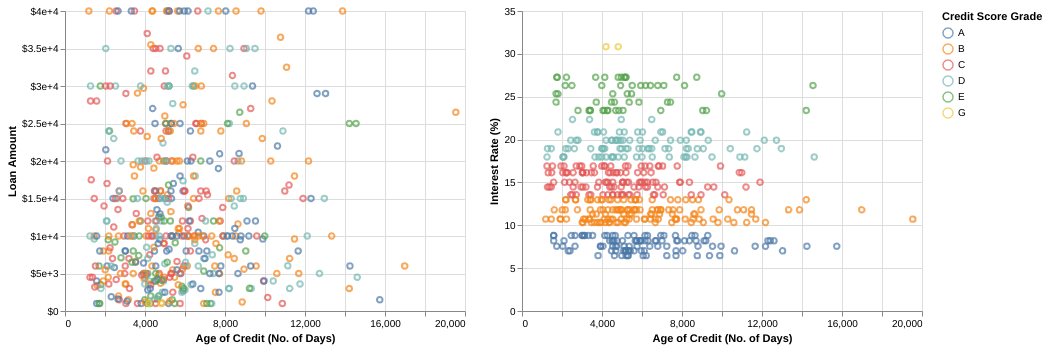

In [40]:
brush = alt.selection(type='interval')

alt.data_transformers.disable_max_rows()
horse_mpg = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('loan_amnt:Q', axis=alt.Axis(format='$', title='Loan Amount')),
    color=alt.condition(brush, 'grade:N', alt.value('lightgray'), title='Credit Score Grade')
).add_selection(brush)

horse_acc = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('int_rate:Q', axis=alt.Axis(title='Interest Rate (%)')),
    color=alt.condition(brush, 'grade:N', alt.value('lightgray'), title='Credit Score Grade')
).transform_filter(
    brush
)

horse_mpg | horse_acc

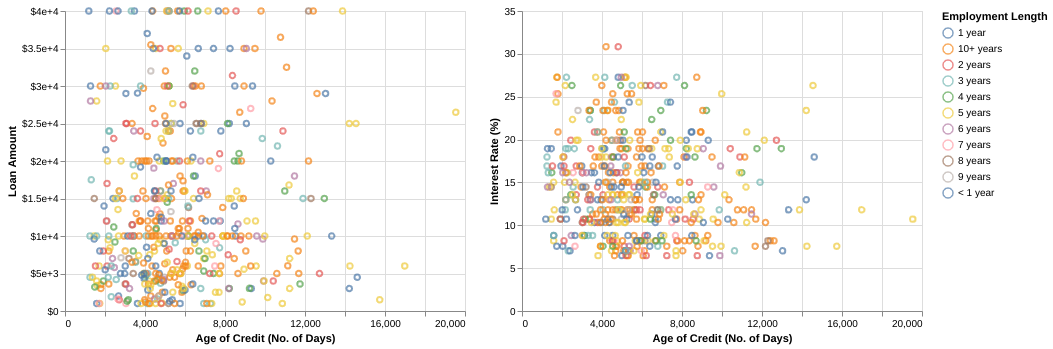

In [41]:
brush = alt.selection(type='interval')

alt.data_transformers.disable_max_rows()
horse_mpg = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('loan_amnt:Q', axis=alt.Axis(format='$', title='Loan Amount')),
    color=alt.condition(brush, 'emp_length:N', alt.value('lightgray'), title='Employment Length')
).add_selection(brush)

horse_acc = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('int_rate:Q', axis=alt.Axis(title='Interest Rate (%)')),
    color=alt.condition(brush, 'emp_length:N', alt.value('lightgray'), title='Employment Length')
).transform_filter(
    brush
)

horse_mpg | horse_acc

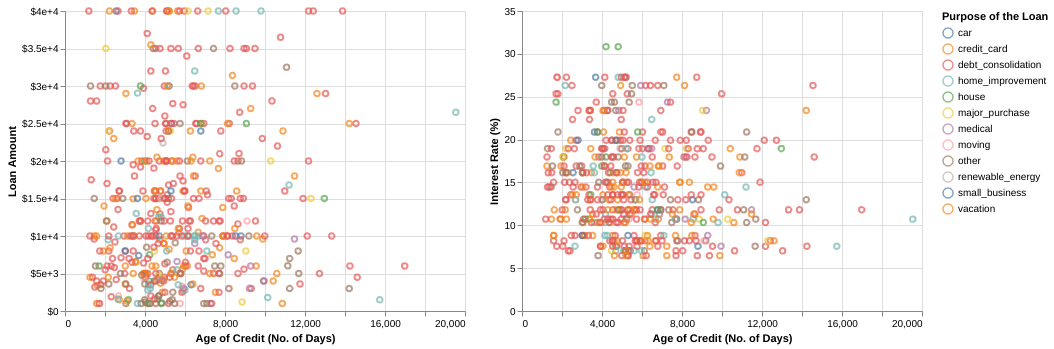

In [42]:
brush = alt.selection(type='interval')

alt.data_transformers.disable_max_rows()
horse_mpg = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('loan_amnt:Q', axis=alt.Axis(format='$', title='Loan Amount')),
    color=alt.condition(brush, 'purpose:N', alt.value('lightgray'), title='Purpose of the Loan')
).add_selection(brush)

horse_acc = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('int_rate:Q', axis=alt.Axis(title='Interest Rate (%)')),
    color=alt.condition(brush, 'purpose:N', alt.value('lightgray'), title='Purpose of the Loan')
).transform_filter(
    brush
)

horse_mpg | horse_acc

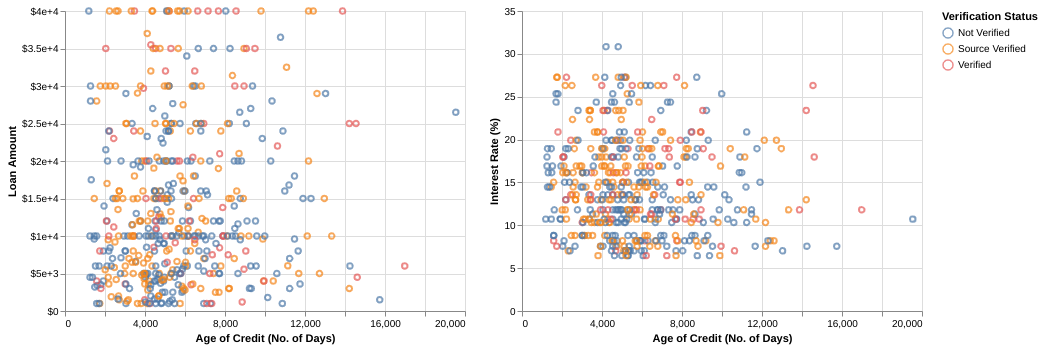

In [43]:
brush = alt.selection(type='interval')

horse_mpg = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('loan_amnt:Q', axis=alt.Axis(format='$', title='Loan Amount')),
    color=alt.condition(brush, 'verification_status:N', alt.value('lightgray'), title='Verification Status')
).add_selection(brush)

horse_acc = alt.Chart(loan_data_2018).mark_point().encode(
    x=alt.X('age_of_credit_in_days:Q', axis=alt.Axis(title='Age of Credit (No. of Days)')),
    y=alt.Y('int_rate:Q', axis=alt.Axis(title='Interest Rate (%)')),
    color=alt.condition(brush, 'verification_status:N', alt.value('lightgray'), title='Verification Status')
).transform_filter(
    brush
)

horse_mpg | horse_acc